# Continuous Probabilistic Methods Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import mason_functions as mf
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    
    '''
    This function defines two paramters, a series and a default multiplier (int or float will do), and returns 
    the upper and lower bounds according to the multipler and series range.
    '''
    
    q1, q3 = series.quantile([.25, .75])    # get quartiles
    
    iqr = q3 - q1    # calculate inter-quartile range
    
    inner_lower_fence = q1 - multiplier * iqr    # set lower fence
    
    inner_upper_fence = q3 + multiplier * iqr    # set upper fence
    
    return inner_lower_fence, inner_upper_fence  # return lower bound and then upper bound

In [3]:
def get_all_the_bounds(df, quant_vars, multiplier = 1.5):
    
    '''
    This function defines 3 paramaters, a dataframe, a list of variables, and a default multiplier.
    It returns the upper and lower bounds for each variable in the list according to the multipler
    and range of the variable listed.
    '''
    
    bounds = pd.DataFrame()   # set an frame to fill
    
    for var in quant_vars:     # loop through numeric varumns
        
        q1, q3 = df[var].quantile([.25, .75])    # get quartiles
    
        iqr = q3 - q1    # calculate inter-quartile range
    
        inner_lower_fence = q1 - multiplier * iqr    # set lower fence
        
        inner_upper_fence = q3 + multiplier * iqr    # set upper fence
        
        outlier_dict = {'lower_bound': inner_lower_fence,     # add values to dictionary
                        'upper_bound': inner_upper_fence,
                        'feature': var
                       }
        
        bounds = bounds.append(outlier_dict, ignore_index = True)    # design dataframe of bounds
    
    bounds = bounds.set_index('feature')
    
    return bounds    # return bounds in an easy-on-the-eyes dataframe

In [4]:
# this function is inspired by Brent Schriver
def get_out_of_bounds(df, quant_vars, multiplier = 1.5):
    
    '''
    This function defines 3 paramaters, a dataframe, a list of variables, and a default multiplier.
    It returns all of the outliers present in the specified dataframe in a new dataframe
    (outlier classification dependent on set/ default multiplier).
    '''
    
    outliers = pd.DataFrame()
    
    for var in quant_vars:     # loop through numeric varumns
        
        q1, q3 = df[var].quantile([.25, .75])    # get quartiles
    
        iqr = q3 - q1    # calculate inter-quartile range
    
        inner_lower_fence = q1 - multiplier * iqr    # set lower fence
        
        inner_upper_fence = q3 + multiplier * iqr    # set upper fence
    
        outliers = outliers.append(df[df[var] < inner_lower_fence])    # add lower outliers to df
        outliers = outliers.append(df[df[var] > inner_upper_fence])    # add upper outliers to df
                        
    return outliers    # return outliers in an easy-on-the-eyes dataframe

In [5]:
def get_below_bounds(df, quant_vars, multiplier = 1.5):

    '''
    This function defines 3 paramaters, a dataframe, a list of variables, and a default multiplier.
    It returns all of the outliers below their respective lower bounds present in the specified dataframe
    in a new dataframe (outlier classification dependent on set/ default multiplier).
    '''
    
    below_ideal = pd.DataFrame()
    
    for var in quant_vars:
        
        q1, q3 = df[var].quantile([.25, .75])    # get quartiles
    
        iqr = q3 - q1    # calculate inter-quartile range
    
        lower_fence = q1 - multiplier * iqr    # set lower fence
        
        below_ideal = below_ideal.append(df[df[var] < lower_fence])    # add outliers to dataframe
    
    return below_ideal    # return lower outliers accumulated in a dataframe

In [6]:
def get_above_bounds(df, quant_vars, multiplier = 1.5):
    
    '''
    This function defines 3 paramaters, a dataframe, a list of variables, and a default multiplier.
    It returns all of the outliers above their respective upper bounds present in the specified dataframe
    in a new dataframe (outlier classification dependent on set/ default multiplier).
    '''

    above_bounds = pd.DataFrame()
    
    for var in quant_vars:
        
        q1, q3 = df[var].quantile([.25, .75])    # get quartiles
    
        iqr = q3 - q1    # calculate inter-quartile range
    
        upper_fence = q3 + multiplier * iqr    # set lower fence
        
        above_bounds = above_bounds.append(df[df[var] > upper_fence])    # add outliers to dataframe
    
    return above_bounds    # return upper outliers accumulated in a dataframe

## Exercise I
Using lemonade.csv dataset and focusing on continuous variables:
* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [7]:
# load data
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

# preview data
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
# look at df info
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [9]:
# read summary statistics
summary_stats = lemonade.describe()
summary_stats

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [10]:
# lower-case column names so I don't have to press the shift button as much
lemonade.columns = lemonade.columns.str.lower()

# set a list of numeric columns
numeric = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

# convert date to datetime object
lemonade.date = pd.to_datetime(lemonade.date)

In [11]:
def distributions_grid(df, quant_vars):

    '''
    This function creates a nice sized figure, enumerates the list of features passed into the function, creates a grid of subplots,
    and then charts histograms for features in the list onto the subplots.
    '''

    plt.figure(figsize = (10, 8))   # create figure

    for i, cat in enumerate(quant_vars):    # loop through enumerated list
    
        plot_number = i + 1     # i starts at 0, but plot nos should start at 1
        
        plt.subplot(3, 2, plot_number)  # create subplot
        
        plt.title(cat)  # title
        
        df[cat].hist(color = 'indigo', edgecolor = 'mediumvioletred', lw = 2, bins = 13)   # display histogram for column

        plt.tight_layout(); # clean

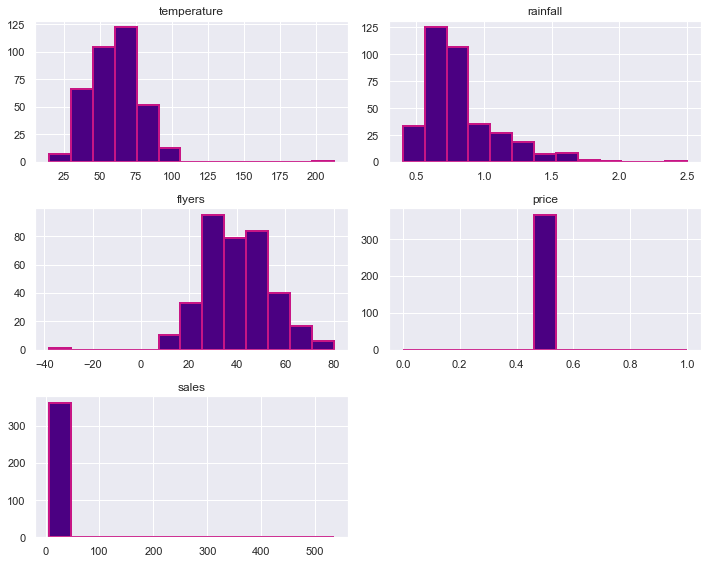

In [12]:
# plot histograms
distributions_grid(lemonade, numeric)

In [13]:
def boxplot_grid(df, quant_vars):

    '''
    This function creates a nice sized figure, enumerates the list of features passed into the function, creates a grid of subplots,
    and then charts boxplots for features in the list onto the subplots.
    '''
    
    plt.figure(figsize = (11, 7))   # create figure
    
    for i, cat in enumerate(quant_vars):    # loop through enumerated list
    
        plot_number = i + 1     # set plot_number to index + 1
        
        plt.subplot(2, 3, plot_number)  # create subplot
        
        plt.boxplot(df[cat])   # display boxplot for column
         
        plt.ylabel(cat)     # label y-axis

        plt.grid(True)      # show gridlines

        plt.tight_layout();    # clean

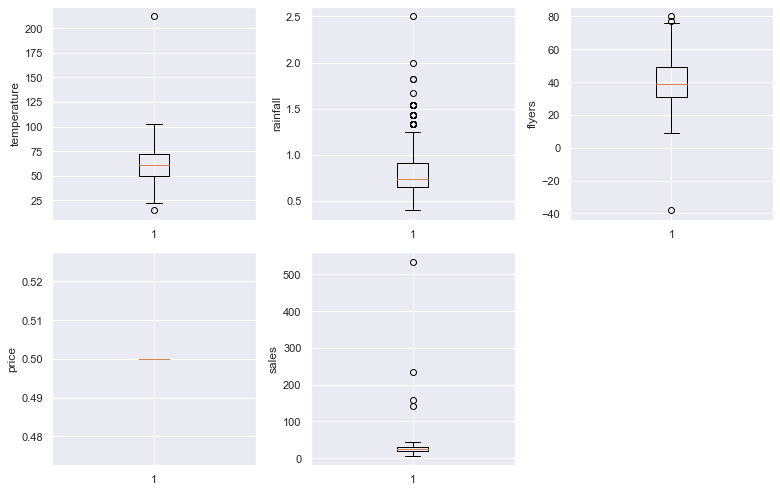

In [14]:
# plot boxplot distributions
boxplot_grid(lemonade, numeric)

### Exercise I A
* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [15]:
type(lemonade['temperature'])

pandas.core.series.Series

In [16]:
# get upper and lower bounds for temperature
get_lower_and_upper_bounds(lemonade.temperature)

(16.700000000000003, 104.7)

In [17]:
numeric

['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [18]:
# get upper and lower bounds for all the columns
get_all_the_bounds(lemonade, numeric)

,lower_bound,upper_bound
feature,,
temperature,16.70,104.7
rainfall,0.26,1.3
flyers,4.00,76.0
price,0.50,0.5
sales,5.00,45.0


In [19]:
# verify function works correctly
get_below_bounds(lemonade, numeric)

,date,day,temperature,rainfall,flyers,price,sales
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


Based on the distributions of my variables, some of these outliers do make sense. 15.1 degrees is outside of normal, but totally plausible this time of the year. 2.5 (inches, I'm assuming) of rainfall falls out of the normal range of values, but it's certainly possible and seems a valid report.
However, -38 flyers does not make much sense. Were flyers torn up? Handed back? What are flyers? The normal range is from 0 to 80. I will assume this observation is a mistake.

### Exercise I B
Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [20]:
# pull up the bounds for all columns for quick reference
bounds = get_all_the_bounds(lemonade, numeric)

# assign variable to all of the upper bounds in a separate dataframe
above_bounds = get_above_bounds(lemonade, numeric)

# view bounds
bounds

,lower_bound,upper_bound
feature,,
temperature,16.70,104.7
rainfall,0.26,1.3
flyers,4.00,76.0
price,0.50,0.5
sales,5.00,45.0


In [21]:
# view upper bounds
above_bounds

,date,day,temperature,rainfall,flyers,price,sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
5,2017-01-06,Friday,25.3,1.54,23,0.5,11
6,2017-01-07,Saturday,32.9,1.54,19,0.5,13
10,2017-01-11,Wednesday,32.6,1.54,23,0.5,12
11,2017-01-12,Thursday,38.2,1.33,16,0.5,14
12,2017-01-13,Friday,37.5,1.33,19,0.5,15
15,2017-01-16,Monday,30.6,1.67,24,0.5,12


Temperature outlier of 212 degrees is berry scary and no, it does not make sense. There are a lot of rainfall outliers that make sense, like maybe a rain storm or a rainy week (the days with above normal rainfall are typically strung together in this dataset). There is one outlier for flyers, it is 4 above the upper bound. That tracks. Then in the 3 days preceding and on the Fourth of July, there are hot sales. Yea, that tracks.

### Excercise I C
Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [22]:
# get extreme bounds
far_out = get_all_the_bounds(lemonade, numeric, 3)

# view extreme bounds
far_out

,lower_bound,upper_bound
feature,,
temperature,-16.30,137.70
rainfall,-0.13,1.69
flyers,-23.00,103.00
price,0.50,0.50
sales,-10.00,60.00


In [23]:
# retrieve lower outliers
get_below_bounds(lemonade, numeric, 3)

,date,day,temperature,rainfall,flyers,price,sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


This outlier was discovered two exercises previous, and no, it does not make sense.

### Exercise I D
Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [24]:
# view extreme bounds
far_out

,lower_bound,upper_bound
feature,,
temperature,-16.30,137.70
rainfall,-0.13,1.69
flyers,-23.00,103.00
price,0.50,0.50
sales,-10.00,60.00


In [25]:
# retrieve greater bounds
get_above_bounds(lemonade, numeric, 3)

,date,day,temperature,rainfall,flyers,price,sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10
343,2017-12-10,Sunday,31.3,1.82,15,0.5,11
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


Yea, these outliers track. Except for you, Ray Bradbury. Except for you.

## Exercise II
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
* Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?

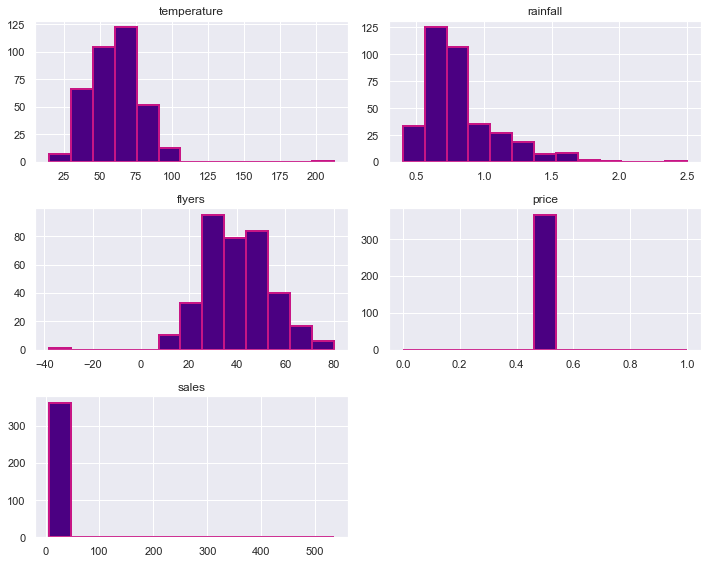

In [26]:
# review distributions
distributions_grid(lemonade, numeric)

Temperature, rainfall and flyers are normally distributed. At best.

In [27]:
# create z-scores for all eligible numeric columns
for col in numeric:
    lemonade[f'{col}_zscore'] = (lemonade[col] - lemonade[col].mean()) / lemonade[col].std()
    
# observe supplemented dataframe
lemonade.head()

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,price_zscore,sales_zscore
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,2017-01-02,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783


In [28]:
# set a list of normally distributed features
normal = ['temperature', 'rainfall', 'flyers']

# set empty frame
outliers = pd.DataFrame()

# run through for-loop on normally distributed features
for feat in normal:
    
    # add all records with z-scores outside two sigmas to the empty frame
    outliers = outliers.append(lemonade[lemonade[f'{feat}_zscore'] > 2])
    outliers = outliers.append(lemonade[lemonade[f'{feat}_zscore'] < -2])
    
# view sigma bounds
for feat in normal:
    
    #print sigma bounds
    print(f" {feat} | 2-Sigma upper bound: {lemonade[feat].mean() + 2 * lemonade[feat].std()}")
    print(f" {feat} | 2-Sigma lower bound: {lemonade[feat].mean() - 2 * lemonade[feat].std()}")
    print(' ------------')

 temperature | 2-Sigma upper bound: 97.39644213085184
 temperature | 2-Sigma lower bound: 25.052872937641396
 ------------
 rainfall | 2-Sigma upper bound: 1.3737531367794353
 rainfall | 2-Sigma lower bound: 0.27819206870001834
 ------------
 flyers | 2-Sigma upper bound: 67.67699877341579
 flyers | 2-Sigma lower bound: 12.531220404666406
 ------------


In [29]:
# view 2-Sigma outliers
outliers

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,price_zscore,sales_zscore
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847
166,2017-06-16,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,NaN,0.424395
176,2017-06-26,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,NaN,0.456708
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,NaN,3.720233
190,2017-07-10,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,NaN,0.392083
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,NaN,0.424395
202,2017-07-22,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,NaN,0.456708
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,NaN,0.489020
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,NaN,-0.577281
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,NaN,-0.674217


All of these outliers make sense except for those previously discussed to be problems. Most outliers should be kept. Except the obvious. I'm lookkng at 212 degrees and -38 flyers.

## Exercise III
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [30]:
# set empty frame
outliers = pd.DataFrame()

# run through for-loop on normally distributed features
for feat in normal:
    
    # add all records with z-scores outside three sigmas to the empty frame
    outliers = outliers.append(lemonade[lemonade[f'{feat}_zscore'] > 3])
    outliers = outliers.append(lemonade[lemonade[f'{feat}_zscore'] < -3])
    
# view sigma bounds
for feat in normal:
    
    #print sigma bounds
    print(f" {feat} | 3-Sigma upper bound: {lemonade[feat].mean() + 3 * lemonade[feat].std()}")
    print(f" {feat} | 3-Sigma lower bound: {lemonade[feat].mean() - 3 * lemonade[feat].std()}")
    print(' ------------')

 temperature | 3-Sigma upper bound: 115.48233442915445
 temperature | 3-Sigma lower bound: 6.966980639338786
 ------------
 rainfall | 3-Sigma upper bound: 1.6476434037992895
 rainfall | 3-Sigma lower bound: 0.00430180168016403
 ------------
 flyers | 3-Sigma upper bound: 81.46344336560313
 flyers | 3-Sigma lower bound: -1.2552241875209376
 ------------


In [31]:
# view outliers
outliers

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,price_zscore,sales_zscore
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
15,2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,NaN,-0.512656
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,NaN,-0.577281
343,2017-12-10,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,NaN,-0.544968
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,NaN,-0.674217
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,NaN,-0.254159


Same answer as the previous question.